In [2]:
import numpy as np
import xgboost as xgb
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split
from xgboost import plot_importance


public_data = pd.read_csv('extracted_public_data.csv')
public_data = public_data.dropna()
mapping = {
    "precision": {"single": 0, "double": 1},
    "backend": {"GPU": 0, "CPU": 1}
}
remapped_public_data = public_data.replace(mapping) 
remapped_public_data['normalized_threshold'] = (1/8) * np.log2(remapped_public_data['threshold'])

features = pd.read_csv('qasm_features_scaled.csv')
embeddings = pd.read_csv('generated_embeddings.csv')
if 'Unnamed: 0' in embeddings.columns:
    embeddings = embeddings.drop(columns=['Unnamed: 0'])

match_col_test = remapped_public_data.columns[0]
match_col_features = features.columns[0]

inputs = pd.merge(
    remapped_public_data, 
    features, 
    left_on=match_col_test, 
    right_on=match_col_features, 
    how='left'
)
inputs = pd.merge(
    inputs, 
    embeddings, 
    left_on='circuit', 
    right_on='name', 
    how='inner'
)

inputs.to_csv('inputs.csv', index=False)



y = public_data['fidelity']
inputs = inputs.drop(columns=['circuit', "threshold", 'fidelity', 'expected_runtime_sec', 'name_x', 'name_y'])




C:\Users\percy\AppData\Local\Temp\ipykernel_44180\4066545378.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  remapped_public_data = public_data.replace(mapping)


In [3]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

X=inputs
Y=y


train_idxD [  1   2   4   6   7   8  10  11  12  13  14  16  17  19  20  21  23  24
  26  27  28  29  32  34  35  36  37  38  40  41  43  44  47  48  49  50
  51  52  53  54  58  59  60  61  62  64  65  66  67  68  69  70  71  74
  75  79  80  81  82  83  85  86  87  88  89  91  92  95  96  97  98  99
 100 102 103 104 105 106 107 109 110 111 112 115 117 119 120 121 122 123
 125 127 128 129 130 131 132 133 134 135 136 138 139 141 142 143 144 146
 147 148 149 151 154 156 157 158 159 160 161 162 164 166 167 169 170 171
 173 174 175 176 178 179 180 181 183 184 185 186 187 188 189 190 191 192
 193 194 195 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 219 220 221 222 223 224 225 226 227 229 230 231
 232 233 235 236 237 238 239 240 241 242 243 244 245 247 249 251 252 253
 254 255 256 257 258 259 260 261 263 264 266 267 268 269 270 271 272 273
 274 275 276 277 278 279 280 281 283 285 286 287 288 289 290 291 292 293
 295 296 298 299 300 301 302 303 304 305

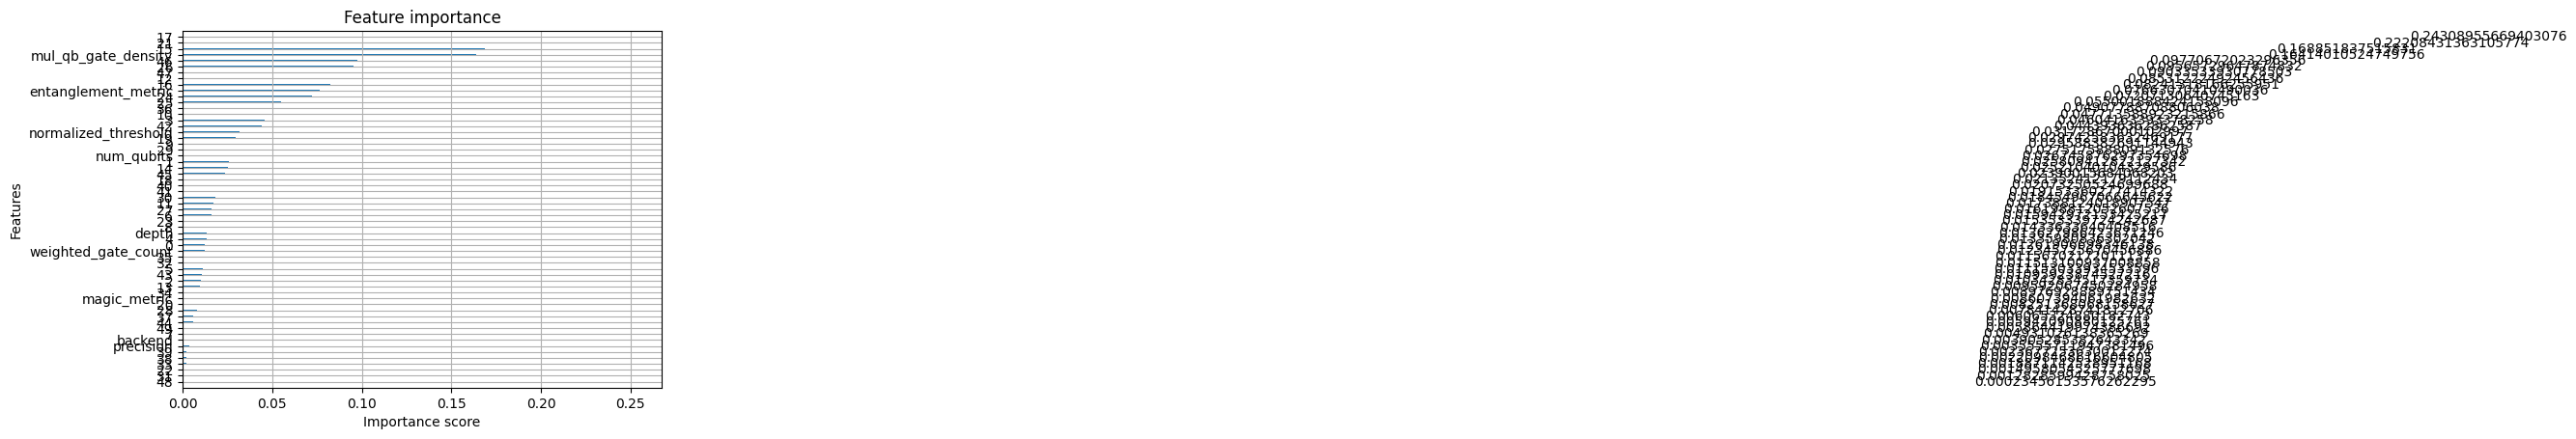

Fold 1 RMSE: 0.0071868461321542435
train_idxD [  0   1   2   3   4   5   8   9  11  12  13  14  15  18  20  21  22  23
  25  26  27  28  29  30  31  32  33  34  35  37  38  39  40  41  42  43
  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  61  62  63
  64  65  67  68  69  70  71  72  73  74  76  77  78  80  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 105 106
 107 108 112 113 114 115 116 117 118 120 121 122 123 124 125 126 127 128
 129 130 133 134 135 136 137 138 140 142 143 144 145 146 147 149 150 151
 152 153 154 155 156 157 159 160 161 162 163 164 165 166 168 169 170 171
 172 174 175 177 178 179 180 182 183 184 185 186 187 188 189 190 191 192
 194 196 197 199 200 201 203 204 205 206 207 208 211 212 213 214 215 216
 217 218 219 221 223 224 225 226 228 230 231 234 235 236 237 239 240 241
 242 243 244 246 247 248 249 250 251 252 254 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 276 279 282 283 284 285 287
 288 

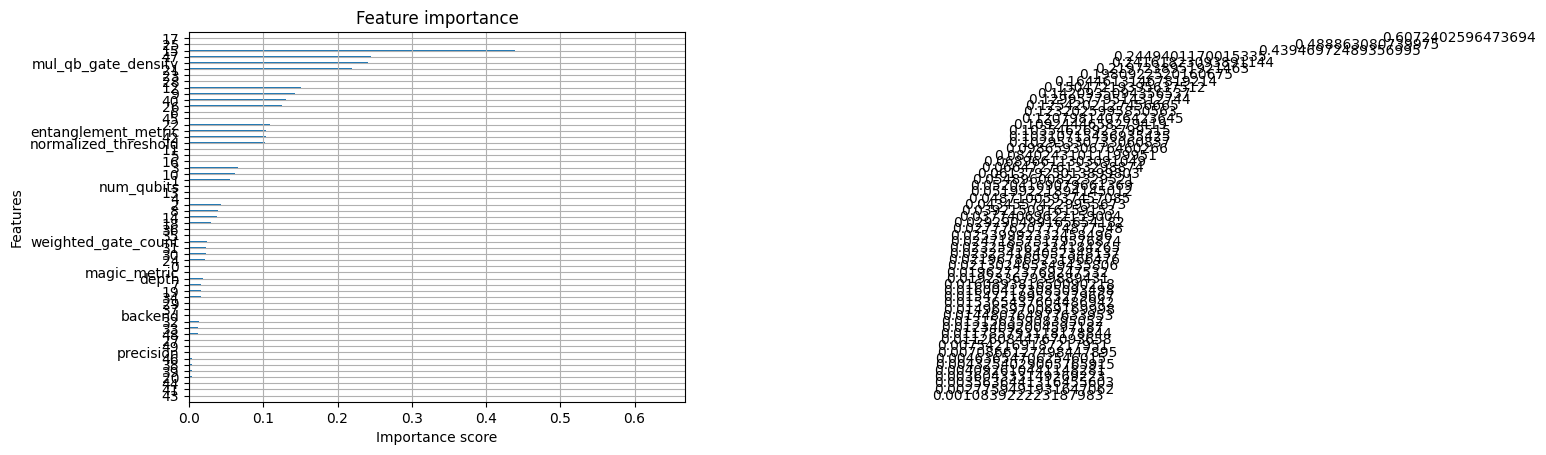

Fold 2 RMSE: 0.011669579515072432
train_idxD [  0   1   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  19
  20  21  22  24  25  27  28  29  30  31  32  33  34  35  36  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  70  71  72  73  75  76  77  78  79  80  81
  82  83  84  85  87  88  90  91  93  94  95  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 113 114 116 118 119 121 124 126 128 130 131
 132 133 134 135 137 138 139 140 141 142 145 148 149 150 151 152 153 155
 156 158 159 160 161 162 163 165 166 167 168 169 170 171 172 173 174 176
 177 178 181 182 184 186 187 188 189 190 191 193 195 196 198 200 201 202
 205 206 207 209 210 212 213 214 215 216 217 218 220 221 222 226 227 228
 229 230 232 233 234 235 236 237 238 240 241 242 243 244 245 246 248 250
 251 252 253 254 255 256 257 259 260 261 262 263 264 265 267 269 270 273
 274 275 276 277 278 279 280 281 282 284 285 286 287 288 290 293 294 295
 296 2

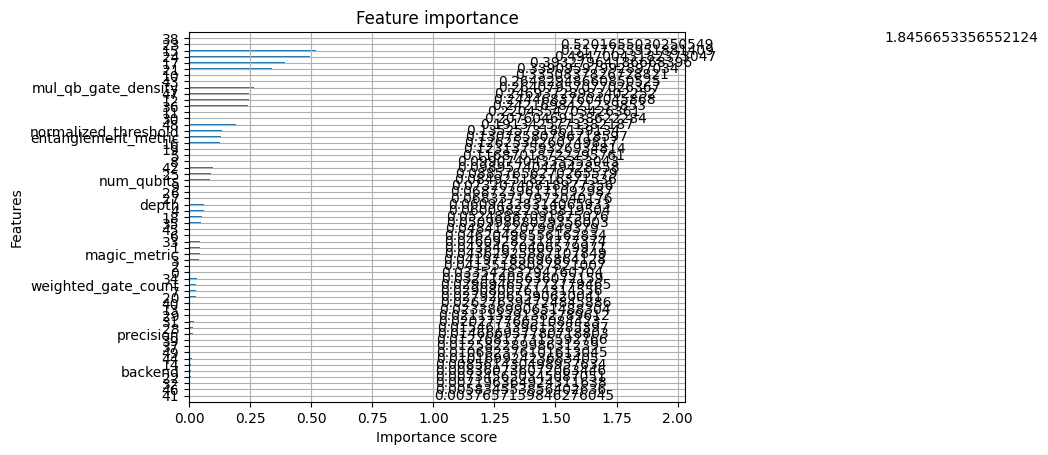

Fold 3 RMSE: 0.015159099703225189
train_idxD [  0   1   2   3   5   6   7   9  10  11  13  15  16  17  18  19  20  21
  22  23  24  25  26  30  31  33  34  36  37  38  39  42  43  45  46  48
  49  50  52  53  54  55  56  57  58  59  60  63  66  67  68  69  71  72
  73  74  75  76  77  78  79  80  81  82  84  86  87  88  89  90  91  92
  93  94  96  97  99 101 102 103 104 105 106 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 129 130 131 132 134
 136 137 139 140 141 143 144 145 146 147 148 149 150 151 152 153 154 155
 157 158 160 161 163 164 165 166 167 168 169 172 173 174 175 176 177 179
 180 181 182 183 185 187 188 189 190 191 192 193 194 195 196 197 198 199
 201 202 203 204 205 208 209 210 211 214 217 218 219 220 222 223 224 225
 227 228 229 231 232 233 234 235 238 239 241 243 245 246 247 248 249 250
 251 252 253 255 257 258 259 262 263 264 265 266 268 269 270 271 272 273
 274 275 276 277 278 280 281 282 283 284 286 289 290 291 292 293 294 295
 296 2

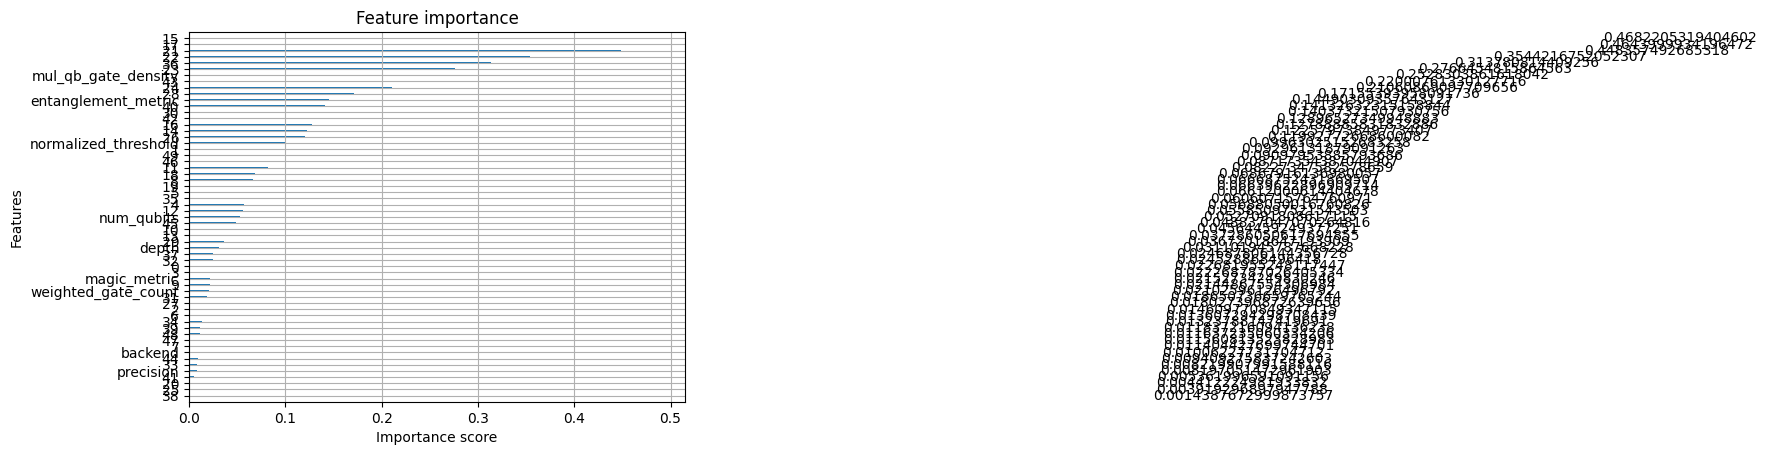

Fold 4 RMSE: 0.009711461783585628
train_idxD [  0   2   3   4   5   6   7   8   9  10  11  12  14  15  16  17  18  19
  22  23  24  25  26  27  28  29  30  31  32  33  35  36  37  38  39  40
  41  42  44  45  46  47  51  55  56  57  59  60  61  62  63  64  65  66
  67  68  69  70  72  73  74  75  76  77  78  79  81  82  83  84  85  86
  89  90  92  93  94  95  96  97  98 100 101 103 104 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 122 123 124 125 126 127 128 129 131
 132 133 135 136 137 138 139 140 141 142 143 144 145 146 147 148 150 152
 153 154 155 156 157 158 159 162 163 164 165 167 168 170 171 172 173 175
 176 177 178 179 180 181 182 183 184 185 186 192 193 194 195 196 197 198
 199 200 202 203 204 206 207 208 209 210 211 212 213 215 216 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 236 237 238 239
 240 242 244 245 246 247 248 249 250 253 254 255 256 258 260 261 262 265
 266 267 268 271 272 274 275 277 278 279 280 281 282 283 284 285 286 287
 288 2

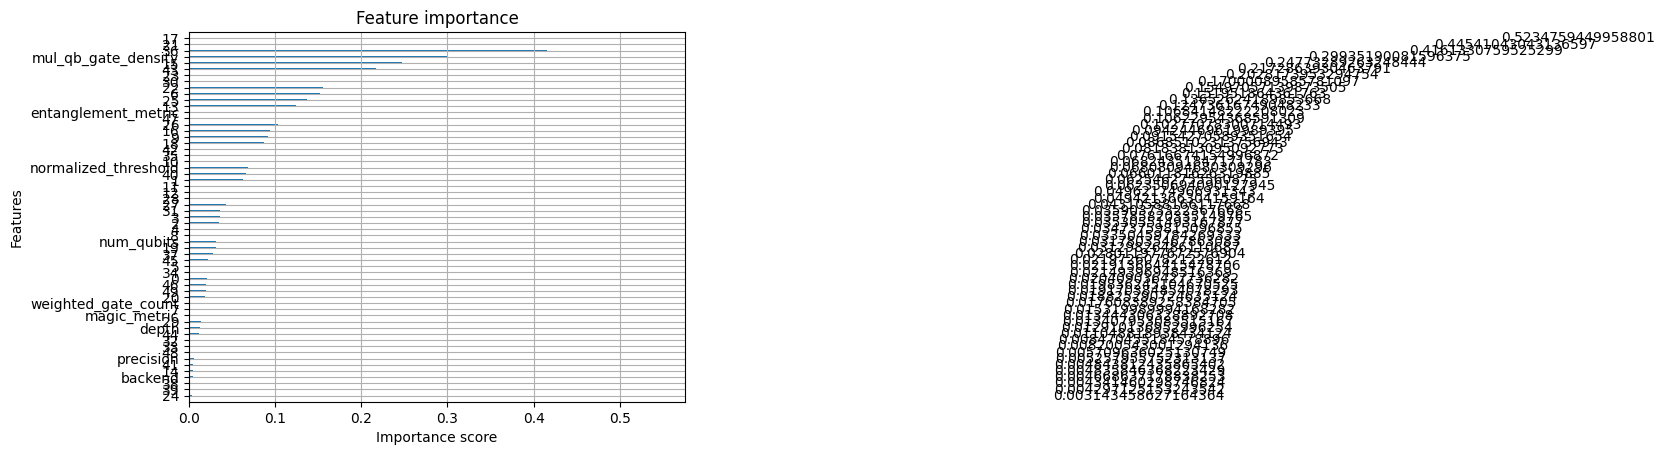

Fold 5 RMSE: 0.013085332070070399


In [7]:

from matplotlib import pyplot as plt


kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_iterations = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print('train_idxD', train_idx)
    print('val_idxD', val_idx)
    X_train = X.iloc[train_idx]
    X_val   = X.iloc[val_idx]

    y_train = y.iloc[train_idx]
    y_val   = y.iloc[val_idx]


    model = xgb.XGBRegressor(
        n_estimators=2000,
        max_depth=6,
        learning_rate=0.03,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        early_stopping_rounds =50,
        objective="reg:squarederror"
    )

    model.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],
        verbose=False
    )

    preds = model.predict(X_val)
    rmse = mean_squared_error(y_val, preds)
    plot_importance(model, importance_type='gain')
    plt.show()

    best_iterations.append(model.best_iteration)
    print(f"Fold {fold+1} RMSE:", rmse)
    model.save_model(f"fidelity_model_fold_{fold}.json")

avg_best_iteration = int(np.mean(best_iterations))

In [ ]:
final_n_estimators = avg_best_iteration

final_model = xgb.XGBRegressor(
    n_estimators=final_n_estimators,
    max_depth=6,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror"
)


print("Training final model on full dataset...")
final_model.fit(X, y)

final_model.save_model("xgb_runtime_model_final.json")
print("Model saved as xgb_runtime_model_final.json")

train_preds = final_model.predict(X)
train_rmse = np.sqrt(mean_squared_error(y, train_preds))
print(f"Final Training RMSE (Self-Correction): {train_rmse:.6f}")

Training final model on full dataset...
Model saved as xgb_runtime_model_final.json
Final Training RMSE (Self-Correction): 0.001426
